In [1]:
from connec_functions import execute_to_df, generate_sparql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import warnings

#warnings.filterwarnings('ignore')

## Publications

In this part, we analyse the publications that are included in the LifeWatch special collections.

In [2]:
publication_info = execute_to_df("1_publication.sparql")
publication_info

,publication,type,publish_date,special_collection
0,http://dev.marineinfo.org/id/publication/252061,Book chapters,2015-01-01,http://dev.marineinfo.org/id/collection/919
1,http://dev.marineinfo.org/id/publication/252061,Book chapters,2015-01-01,http://dev.marineinfo.org/id/collection/945
2,http://dev.marineinfo.org/id/publication/252061,Book chapters,2015-01-01,http://dev.marineinfo.org/id/collection/941
3,http://dev.marineinfo.org/id/publication/252061,Book chapters,2015-01-01,http://dev.marineinfo.org/id/collection/880
4,http://dev.marineinfo.org/id/publication/252061,Book chapters,2015-01-01,http://dev.marineinfo.org/id/collection/39
...,...,...,...,...
19172,http://dev.marineinfo.org/id/publication/301079,Journal article,2018-01-01,http://dev.marineinfo.org/id/collection/941
19173,http://dev.marineinfo.org/id/publication/301079,Journal article,2018-01-01,http://dev.marineinfo.org/id/collection/915
19174,http://dev.marineinfo.org/id/publication/301079,Journal article,2018-01-01,http://dev.marineinfo.org/id/collection/947
19175,http://dev.marineinfo.org/id/publication/301079,Journal article,2018-01-01,http://dev.marineinfo.org/id/collection/39


In [3]:
publications = publication_info.groupby('publication').nunique()

In [4]:
print(f'There are {publications.shape[0]} publications in the LifeWatch special collections.')

publications

There are 3811 publications in the LifeWatch special collections.


,type,publish_date,special_collection
publication,,,
http://dev.marineinfo.org/id/publication/100295,1,1,8
http://dev.marineinfo.org/id/publication/100297,1,1,11
http://dev.marineinfo.org/id/publication/100343,1,1,9
http://dev.marineinfo.org/id/publication/100354,1,1,10
http://dev.marineinfo.org/id/publication/100534,1,1,6
...,...,...,...
http://dev.marineinfo.org/id/publication/97370,1,1,5
http://dev.marineinfo.org/id/publication/97418,1,1,11
http://dev.marineinfo.org/id/publication/98075,1,1,16


### a. Number of publications

In [5]:
# manipulate date datatype
publication_info['publish_date'] = pd.to_datetime(publication_info['publish_date'])
publication_info['publish_year'] = publication_info['publish_date'].dt.year

In [6]:
# assess publications with missing publish_date
pubs_with_missing_publish_year = len(publication_info[publication_info['publish_year'].isnull()])
print(f'number of publications with missing publish date: {pubs_with_missing_publish_year}')

number of publications with missing publish date: 15


In [7]:
# replace all NaN values with zeros & convert from float to int
publication_info['publish_year'] = publication_info['publish_year'].fillna(0).astype(int)

In [8]:
# set & select date range
START_YEAR = 2012
END_YEAR = 2024

publication_info_12_24 = publication_info[ (publication_info['publish_year'] >= START_YEAR) & (publication_info['publish_year'] <= END_YEAR) ]
publication_info_12_24

,publication,type,publish_date,special_collection,publish_year
0,http://dev.marineinfo.org/id/publication/252061,Book chapters,2015-01-01,http://dev.marineinfo.org/id/collection/919,2015
1,http://dev.marineinfo.org/id/publication/252061,Book chapters,2015-01-01,http://dev.marineinfo.org/id/collection/945,2015
2,http://dev.marineinfo.org/id/publication/252061,Book chapters,2015-01-01,http://dev.marineinfo.org/id/collection/941,2015
3,http://dev.marineinfo.org/id/publication/252061,Book chapters,2015-01-01,http://dev.marineinfo.org/id/collection/880,2015
4,http://dev.marineinfo.org/id/publication/252061,Book chapters,2015-01-01,http://dev.marineinfo.org/id/collection/39,2015
...,...,...,...,...,...
19172,http://dev.marineinfo.org/id/publication/301079,Journal article,2018-01-01,http://dev.marineinfo.org/id/collection/941,2018
19173,http://dev.marineinfo.org/id/publication/301079,Journal article,2018-01-01,http://dev.marineinfo.org/id/collection/915,2018
19174,http://dev.marineinfo.org/id/publication/301079,Journal article,2018-01-01,http://dev.marineinfo.org/id/collection/947,2018
19175,http://dev.marineinfo.org/id/publication/301079,Journal article,2018-01-01,http://dev.marineinfo.org/id/collection/39,2018


In [9]:
publications_12_24 = publication_info_12_24.groupby('publication').nunique()
print(f'There are {publications_12_24.shape[0]} publications withing the defined time range.')

There are 3525 publications withing the defined time range.


In [10]:
# calculate number & cummulative number of publications per publish year 
pubs_per_publishyear = publication_info_12_24.groupby('publish_year').nunique()
pubs_per_publishyear['publication_cumsum'] = pubs_per_publishyear['publication'].cumsum(skipna=False)

In [11]:
# Table
pubs_per_publishyear.rename(columns={
    'publication': 'Number of publications', 
    'publication_cumsum': 'Cummulative number of publications'}, inplace=True)

pubs_per_publishyear.transpose()

publish_year,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Number of publications,86,151,156,184,182,201,380,427,488,500,402,363,5
type,6,5,5,6,6,6,6,6,6,7,6,5,2
publish_date,1,1,1,1,1,1,1,1,1,1,1,1,1
special_collection,38,41,41,47,41,38,55,48,51,42,42,27,5
Cummulative number of publications,86,237,393,577,759,960,1340,1767,2255,2755,3157,3520,3525


/tmp/ipykernel_9942/1180679645.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(pubs_per_publishyear.index.astype(str), rotation=30)
/tmp/ipykernel_9942/1180679645.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(pubs_per_publishyear.index.astype(str), rotation=30, ha='right')


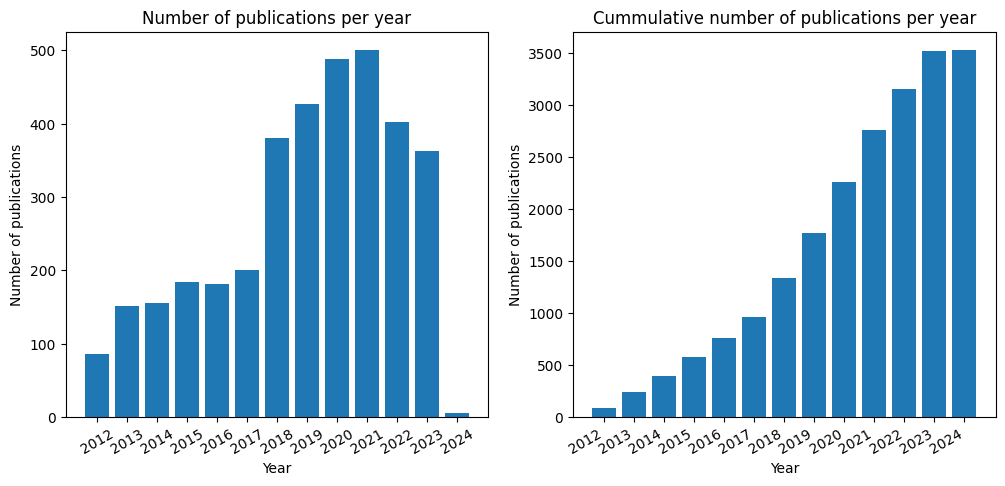

In [12]:
# Horizontal barplot of number of publiations per publish year
fig, ax = plt.subplots(1,2, figsize=(12,5))

ax[0].bar(pubs_per_publishyear.index.astype(str), pubs_per_publishyear['Number of publications'])
ax[0].set_title('Number of publications per year')
ax[0].set_ylabel('Number of publications')
ax[0].set_xlabel('Year')
ax[0].set_xticklabels(pubs_per_publishyear.index.astype(str), rotation=30)

ax[1].bar(pubs_per_publishyear.index.astype(str), pubs_per_publishyear['Cummulative number of publications'])
ax[1].set_title('Cummulative number of publications per year')
ax[1].set_ylabel('Number of publications')
ax[1].set_xlabel('Year')
ax[1].set_xticklabels(pubs_per_publishyear.index.astype(str), rotation=30, ha='right')

plt.show()

### b. Author affiliations - (from here still work in progress)

This was originally first author affiliation. However the graph structure of linked data facilitates including the affiliation of all authors linked to a publication.

#### Assessment of author information linked to a publication:

In [ ]:
#publication with missing authors --> currently breaking kernel due blanknode issue
pub_auth = execute_to_df("1_publication-authors.sparql") 
pub_auth

In [ ]:
#publications with authors, with missing name information
pub_auth_name = execute_to_df("1_publication-authors-name-info.sparql")
pub_auth_name

In [ ]:
#publications with authors, with missing identifier information
pub_auth_id = execute_to_df("1_publication-authors-id-info.sparql")
pub_auth_id

In [ ]:
#publication with authors, with missing affiliation id information
pub_auth_affil = execute_to_df("1_publication-authors-affil-info.sparql")
pub_auth_affil

#### Horizontal histogram graph of number of publications per country of the (first) author affiliation

In [ ]:
# Country infor of publications with authors that have a recorded affiliation-ID
pub_auth_info = execute_to_df("1_publication-authors-country.sparql")
pub_auth_info

In [ ]:
## Table
country_pubs = pub_auth_info.groupby('country_name').nunique().sort_values(ascending=False)
country_pubs

In [ ]:
## Horizontal histogram graph 
fig, ax = plt.subplots()
ax.barh(country_pubs)
ax.set_xlabel('number of publications')
ax.set_title('Number of unique publications per country')

plt.show()

In [ ]:
# Publications with locationCreated
pub_location = execute_to_df("1_publication-locationcreated.sparql")
pub_location

In [ ]:
## Table
location_pubs = pub_location.groupby('location_created').nunique().sort_values(ascending=False)
location_pubs

In [ ]:
## Horizontal histogram graph 
fig, ax = plt.subplots()
ax.barh(location_pubs)
ax.set_xlabel('number of publications')
ax.set_title('Number of unique publications per country')

plt.show()

#### Table of (first) author affiliations per quadruple helix category

In [ ]:
# Group & qh info of publications with authors that have a recorded affiliation-ID
pub_auth_groupQH_info = execute_to_df("1_publication-authors-group-qh.sparql")
pub_auth_groupQH_info

In [ ]:
## table
qh_group_pubs = pub_auth_groupQH_info.groupby(['qh','group']).nunique()
qh_group_pubs

### C. Relevance to Sustainable Development Goals (SDG's)